# Title: Judging a Book by Its Cover (Book Genre Classification and Image Captioning)
### UNI: pc3019
### By: Preethi Chandirasekeran



#### Link to Presentation Video: https://youtu.be/VaFsqBOc19U

In [1]:
from IPython.display import display, Image

## Introduction

It is often said that one should not judge a book by its cover. However, most readers analyze the cover while forming an opinion on a book. This project leverages book cover images to achieve two main goals. The first is to build deep learning models for book genre classification. The second is to build an image captioning model for book covers. These models can be used to provide more insight to prospective readers and help them choose books that they would enjoy reading. These models can also be used by authors who find the genre of their book ambiguous and want to determine the genre of their book to ensure that it reaches the appropriate audience. Furthermore, understanding how to describe book genres from book covers can be used to improve book recommender systems and improve the accessibility of book recommendation systems to the visually impaired. This project uses a dataset constructed from web scraping the social cataloging website Goodreads.com which contains a vast collection of digitized book covers, book reviews, ratings, quotes, and more. 

## Related Works

Genre classification is a growing area of interest in the computer vision community. Researchers have investigated artistic genre classification of paintings [1][2], movie poster genre classification [3], music genre classification [4][5], and more. There is a large potential to further explore book genre classification. <br> <br>
Researchers have explored the use of book content [7] [10], high quality summaries [8], book titles [6] [11], and book reviews [9] for developing book genre classification systems. Several existing works use pre-compiled datasets such as the CMU book summary dataset [8] or BookCover30 dataset [13]. Certain studies have also leveraged APIs such as the OpenLibrary API [12]. Buczkowski et al. [15] implemented a CNN and a VGG inspired approach to book genre prediction using book cover images. Biradar et al. [16] combined both image and text features by leveraging the book cover and title. The authors [16] used a multinomial logistic regression model to predict the book genre using these features. 


## Dataset

### Data Acquisition
Goodreads.com is a popular social cataloging website with a vast collection of digitized book reviews, summaries, book ratings, book quotes, and more. Goodreads also segregates the books into different genres such as Horror, Fantasy, Memoirs, and more. The dataset was collected by web scraping Goodreads.com using Selenium. Goodreads restricts the number of visible books to 50 for users who are not logged in. To overcome this, Selenium was used to automate login. After signing in, Selenium was used to web scrape 50 pages of book URLs for each genre.  6 genres were web scraped for this project namely, Horror, Memoir, Romance, Self Help, Science Fiction, and Fantasy. A snippet of the web scraping code created is given below. 

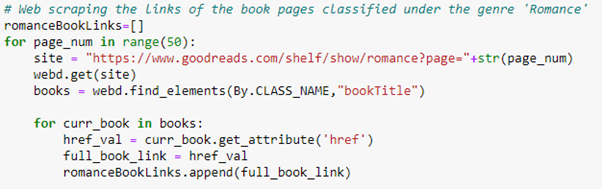

In [2]:
display(Image(filename="webscrapingsnippet.png"))

Then from each specific book page, the cover image and title were extracted. The book title and corresponding book page URL were written to a csv file. The image of the book cover was saved in the folder for the corresponding genre. Sample images from the dataset are given below.

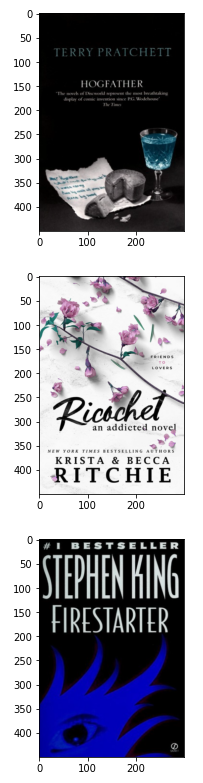

In [3]:
display(Image(filename="sampleimages.png"))

### Dataset Description

After web scraping the images, the following dataset distribution was obtained <br>
Fantasy: 1,238 images<br>
Horror: 1,235 images<br>
Memoir: 1,247 images<br>
Romance: 1,227 images<br>
Science Fiction: 1,240 images<br>
Self Help: 1,248 images<br>
A total of 7,435 images were web scraped


### Data Cleaning
The duplicate book cover images were deleted such that each book is associated with one genre. After this, the dataset was checked for any book cover images that were GIFs saved as JPEGs. A total of 3 such images were identified and removed from the dataset. <br>
After cleaning the dataset, the following dataset distribution was obtained. <br>
Fantasy: 938 images<br>
Horror: 1,235 images<br>
Memoir: 1,242 images<br>
Romance: 1,147 images<br>
Science Fiction: 1,098 images<br>
Self Help: 1,247 images<br>
The total size of the cleaned dataset is 6,907 images.


## Methodology
### Genre Classification

In this project, 3 models were explored for genre classification using transfer learning namely, Resnet-18, Resnet-50, and VGG-16. Resnet-18 is a CNN that is 18 layers deep and leverages skip connections to skip over some layers. The Resnet18 model used in this project was pretrained on millions of images from ImageNet and was accessed using PyTorch. The original ResNet-18 architecture [17] is given below.

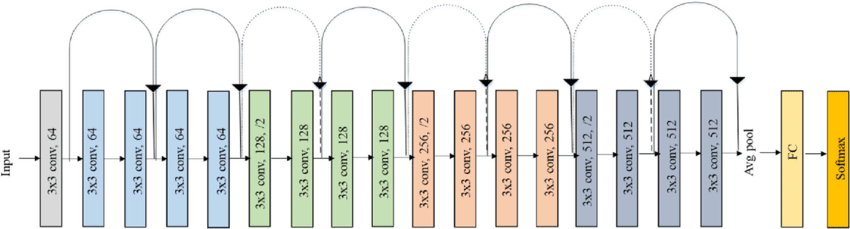

In [4]:
display(Image(filename="resnet_18_architecture.png"))

Resnet-50 is another variant of the Resnet architecture. It is 50 layers deep and uses bottleneck design for its building blocks. This refers to the 1x1 convolutions used which speeds up the training by reducing the number of matrix multiplications and parameters. A pretrained resnet-50 model was implemented in this project using PyTorch. <br><br>
VGG-16 is a state-of-the-art neural network which has achieved excellent results for image classification problems through transfer learning. It is a CNN that is pretrained on a subset of ImageNet. VGG-16 is 16 layers deep with 5 MaxPooling layers, 3 Dense layers, and 13 Convolution layers. Although the number of layers sums up to 21, there are only 16 weight layers.


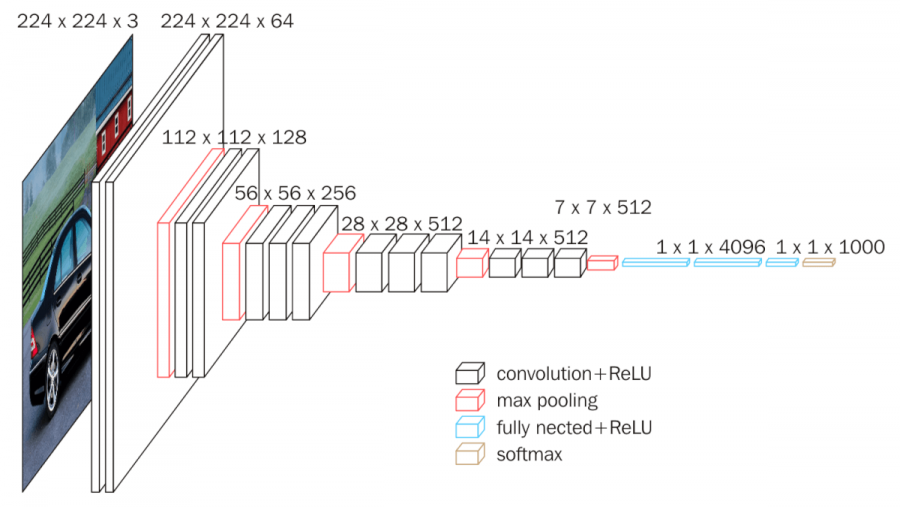

In [5]:
display(Image(filename="vgg_16_architecture.png"))

### Image Captioning

Another objective of this project was to perform image captioning of the book cover images. The image captioning model was trained using the Flickr8K dataset. It is a dataset of 8,000 images where each image is mapped to 5 captions which describe the content of the image. The image embedding was implemented using Inception v3 which is a model pretrained on ImageNet. It accepts an input shape of 299x299x3 and creates an embedding vector of dimensions 256x1. <br><br> 
The captions from the dataset are preprocessed before passing to the RNNs. Text preprocessing includes converting to lowercase, removing special characters, and more. “startseq” is added to the beginning of each caption. Similarly, “endseq” is added to the end of each caption. 


The word embedding technique used is GloVe. GloVe is an unsupervised learning algorithm to obtain the word vector representations. The GloVe embedding representation used in this project has 6 billion tokens and 200 features. To obtain the predicted image caption, the image is passed to the model with the input string “startseq”. Then the model predicts the next word and this word is appended to the input string. This repeats until “endseq” is reached or the maximum sentence length is reached. The layers of the model built are given below.

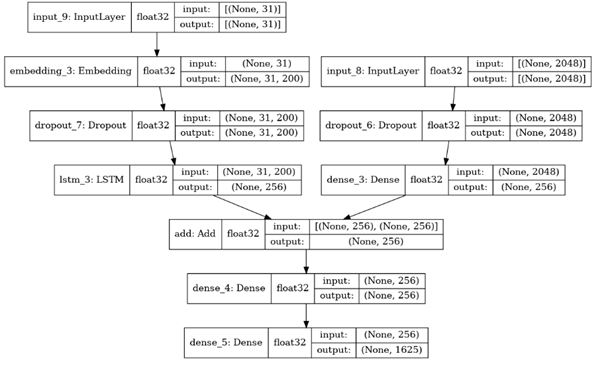

In [6]:
display(Image(filename="imagecaptionmodel.png"))

## Results and Discussion

### Genre Classification


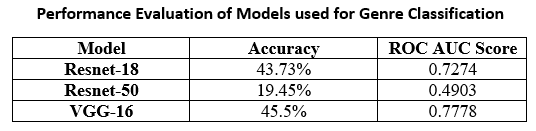

In [7]:
display(Image(filename="classificationresults.png"))

From the above results we infer that the VGG-16 model had the best performance on the given dataset. It was followed closely by the Resnet-18 model. The ROC AUC scores align with the accuracy values. Obtaining an accuracy of around 45% is very good for the given dataset considering that there are 6 classes. As previously mentioned in the project proposal, one of the key objectives was to perform genre classification with an accuracy between 40-50%. This objective has been successfully achieved. 

### Image Captioning

A few sample book cover images and the corresponding predicted caption generated by the model are given below. 


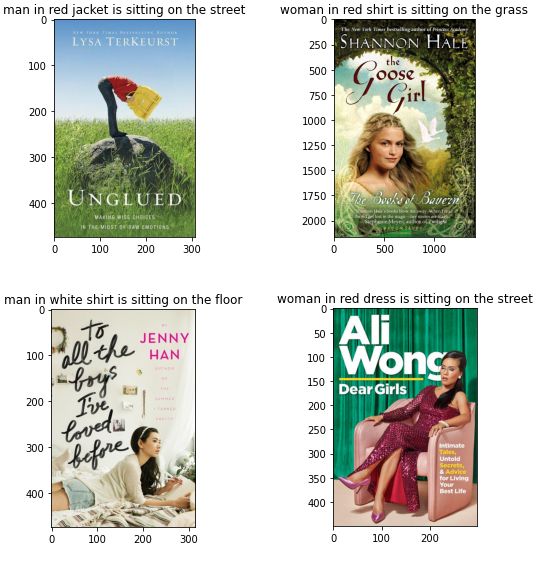

In [8]:
display(Image(filename="imagecaptionresults1.png"))

The model is able to identify certain basic elements in an image. The model correctly identified a person in a red jacket in the first image. It correctly identified a woman on grass in the second image. It correctly identified a person wearing a white shirt sitting on the floor in the third image. It also correctly identified a woman sitting in the fourth image. However, it also made incorrect predictions such as captioning that the woman in the fourth image is sitting on the street. 

Overall, the image captioning model performed fairly well. Given the nature of the Flickr8k dataset, the model was more inclined towards making predictions about whether a “man” or “woman” was present in the image or color elements such as “white shirt” or “red dress”. This is fine for certain book covers such as memoirs which usually feature a person on the cover. However, many book covers possess abstract images or random objects, especially fantasy and science fiction books. Some examples are shown below. In order to make predictions for these types of book covers we require a model trained on a larger vocabulary. 

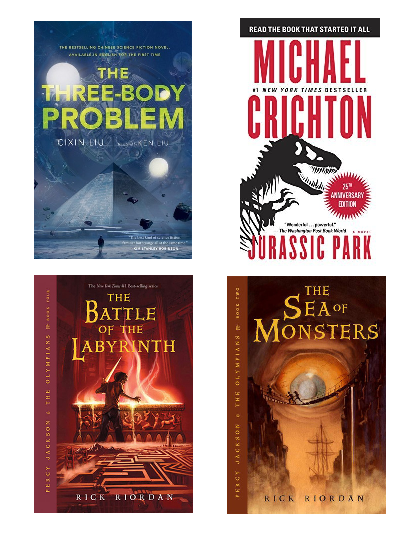

In [9]:
display(Image(filename="imagecaptionresults2.png"))

## Conclusion and Future Scope

In the project proposal, three key objectives were outlined for this project. The first was to create a dataset of book cover images and the genres of the corresponding books. A dataset of over 7,400 images was constructed through web scraping using Selenium. The second objective was to implement various models for genre classification with an aim of reaching an accuracy of 40-50%. Three models (Resnet-18, Resnet-50, and VGG-16) were implemented using transfer learning and two of the models obtained accuracies of about 45%. Therefore, the second key objective has also been achieved. Finally, the third objective was to leverage multimodal data to perform image captioning of the book covers. This is a challenging task due to the fact that many book covers are often stylized and include a mix of text and images. The objective was to implement an image captioning model which can identify the basic content of the book covers. The Flickr8k dataset was successfully used to build an image captioning model. The model was able to identify basic content elements of the book covers such as people (E.g “man”, “woman”), colors (E.g “red dress”, “white shirt”), certain human actions (E.g “sitting on the floor”), and more.  <br> <br>
Thus, all of the major objectives of this project have been achieved successfully. This work can be extended by exploring the use of different datasets to train the image captioning system. This can be done with the aim of being able to correctly caption and identify complex elements in heavily stylized book covers (such as “Fantasy” or “SciFi” books). The future scope can also include implementing and comparing the performance of different models for genre classification. 

## References

[1] Cetinic, E. and Grgic, S. (2016) “Genre classification of paintings,” 2016 International Symposium ELMAR [Preprint]. Available at: https://doi.org/10.1109/elmar.2016.7731786. <br>
[2] Nunez-Garcia, I., Lizarraga-Morales, R.A. and Hernandez-Gomez, G. (2018) “Classification of paintings by artistic genre integrating color and texture descriptors,” Proceedings of the 2018 International Conference on Artificial Intelligence and Pattern Recognition  - AIPR 2018 [Preprint]. Available at: https://doi.org/10.1145/3268866.3268885. <br>
[3] Marcellus, M., Herwindiati, D.E. and Hendryli, J. (2021) “Movie poster genre classification with Convolutional Neural Network,” 2021 IEEE Seventh International Conference on Multimedia Big Data (BigMM) [Preprint]. Available at: https://doi.org/10.1109/bigmm52142.2021.00020.<br>
[4] https://dl.acm.org/doi/abs/10.1145/3529399.3529407<br>
[5] https://dl.acm.org/doi/abs/10.1145/3501409.3501632 <br>
[6] https://ieeexplore.ieee.org/document/8821643<br>
[7] https://ieeexplore.ieee.org/document/8776935 <br>
[8] https://ieeexplore.ieee.org/document/9887417 <br>
[9] https://dl.acm.org/doi/abs/10.1007/978-3-030-98305-5_18<br> 
[10] https://ieeexplore.ieee.org/document/9432303 <br>
[11] https://link.springer.com/chapter/10.1007/978-981-16-0733-2_23<br> 
[12] https://cs229.stanford.edu/proj2015/127_poster.pdf <br>
[13] https://arxiv.org/pdf/2011.07658.pdf <br>
[14] https://www.kaggle.com/code/locchuong/flickr8k-image-captioning/ <br> 
[15] https://pdfs.semanticscholar.org/dc97/f5e9176ba278085cd2c56db56b8851fa864c.pdf <br>
[16] https://ieeexplore.ieee.org/document/8998122 <br>
[17] https://arxiv.org/abs/1512.03385 <br>
[18] https://www.robots.ox.ac.uk/~vgg/publications/2015/Simonyan15/ <br> 
